# 🧬 tRNA-Sec Alignment & Phylogenetic Analysis

This notebook demonstrates the full pipeline for:
1. Converting RNAcentral CSV into FASTA  
2. Aligning sequences with Infernal  
3. Building a phylogenetic tree with FastTree  
4. Visualizing and interpreting results  
5. Generating sequence logos  
6. Predicting RNA secondary structures by species  

All heavy lifting is done by functions in `scripts/aligner.py`.  
Configuration of paths is stored in `scripts/config.py`.  

---

# ⚙️ Requirements and Setup

This notebook was tested on **Windows 11** (via Python + WSL for some tools).  
It should also run on **Ubuntu/Linux**, but paths in `config_aligner.py` may need to be adapted.  

## 🐍 Python dependencies

Install these packages before running the notebook:

```bash
pip install biopython pandas ete3 logomaker matplotlib cairosvg viennarna
```

## 🛠️ External executables

Make sure the following tools are installed and paths are configured in config_aligner.py:

Infernal (cmalign, esl-reformat)

FastTree

ViennaRNA (provides RNAfold and Python bindings)

Example paths (from config_aligner.py):
```
cmalign_bin      = "/usr/bin/cmalign"
esl_reformat_bin = "/home/user/infernal/easel/miniapps/esl-reformat"
cm_model         = "/home/user/infernal/RF01852.cm"
fasttree_exe     = r"C:\Program Files\FastTree\FastTree.exe"
```

In [2]:
import sys
sys.path.append("..")  # make sure Python sees the project root

from scripts import aligner, config_aligner as config



## 📥 Step 1: Convert CSV to FASTA
We start by transforming the RNAcentral dataset (CSV) into a FASTA file, 
with clean species names and a mapping file for later interpretation.


In [3]:
aligner.convert_csv_to_fasta(
    csv_path= '../data/raw/400_trna_sec.csv',#config.input_file,
    fasta_path=config.fasta_default
)


✅ FASTA file created: ../data/processed/tRNA_sequences.fasta
✅ Mapping saved to: ../results/tables/id_mapping.csv


## 🔗 Step 2: Run alignment with Infernal
We use `cmalign` and `esl-reformat` to align all sequences against the RF01852 model.


In [20]:
# 1. Execute cmalign 
print("=== STEP 1: Running cmalign ===")

aligner.run_cmalign(
    cmalign_bin=config.cmalign_bin,
    cm_model=config.cm_model,
    fasta_wsl=config.fasta_wsl,
    sto_wsl=config.sto_wsl
)

# 2. Execute esl-reformat
print("\n=== STEP 2: Converting to FASTA ===")

aligner.run_esl_reformat(
    sto_wsl=config.sto_wsl, 
    aligned_wsl=config.aligned_wsl,
    esl_reformat_bin=config.esl_reformat_bin
)

# 3. Vista previa
print("\n=== STEP 3: Alignment preview ===")
aligner.preview_alignment(aligned_windows=config.aligned_default, n=20)

=== STEP 1: Running cmalign ===
⏳ Running cmalign for unaligned sequences...
⚠️ This may take several minutes depending on sequence count
⏱️ Execution time: 5.41 seconds
Exit code: 0
✅ Success! Stockholm file generated: /mnt/c/Users/ro-ma/Documents/GitHub/tRNASec-Study-Project/data/processed/tRNA_sequences.sto

=== STEP 2: Converting to FASTA ===
🔄 Trying alternative esl-reformat method...
✅ Aligned FASTA generated (alternative method): /mnt/c/Users/ro-ma/Documents/GitHub/tRNASec-Study-Project/data/processed/tRNA_alignment.fasta

=== STEP 3: Alignment preview ===

📖 Vista previa del alineamiento:
>URS00001DA281_9606|Homo_sapiens|Homo sapiens (human) tRNA-SeC (anticodon TCA) 1-1 (TRU-TCA1-1)
......GCCCGGAUG.....AUCCU.C.A.GUGGU.........................
....CUGGGGUGCAGGCUUCAA.A..............................CCUGU.
A.GCUGUCUAGC--....--...........GACAGA..-GUGGUUCAAUU.........
..................CCAC............CUUU.CGG...G.Cg...........
>URS0000C8E9EB_9606|Homo_sapiens|Homo sapiens (human) tR

## 🌳 Step 3: Build phylogenetic tree
Aligned sequences are passed to FastTree to infer a phylogenetic tree.

In [21]:
aligner.build_phylogenetic_tree(
    config.aligned_default,
    config.tree_default,
    config.fasttree_exe
)


⏳ Building phylogenetic tree with FastTree...
✅ Tree saved: ../results/tables/tRNA_phylogenetic_tree.nhx


## 🌐 Step 4: Radial visualization
Render the tree in a circular layout using ete3.


📊 Rendering radial phylogenetic tree...
✅ Radial tree image saved: ../results/figures/tree_radial.png


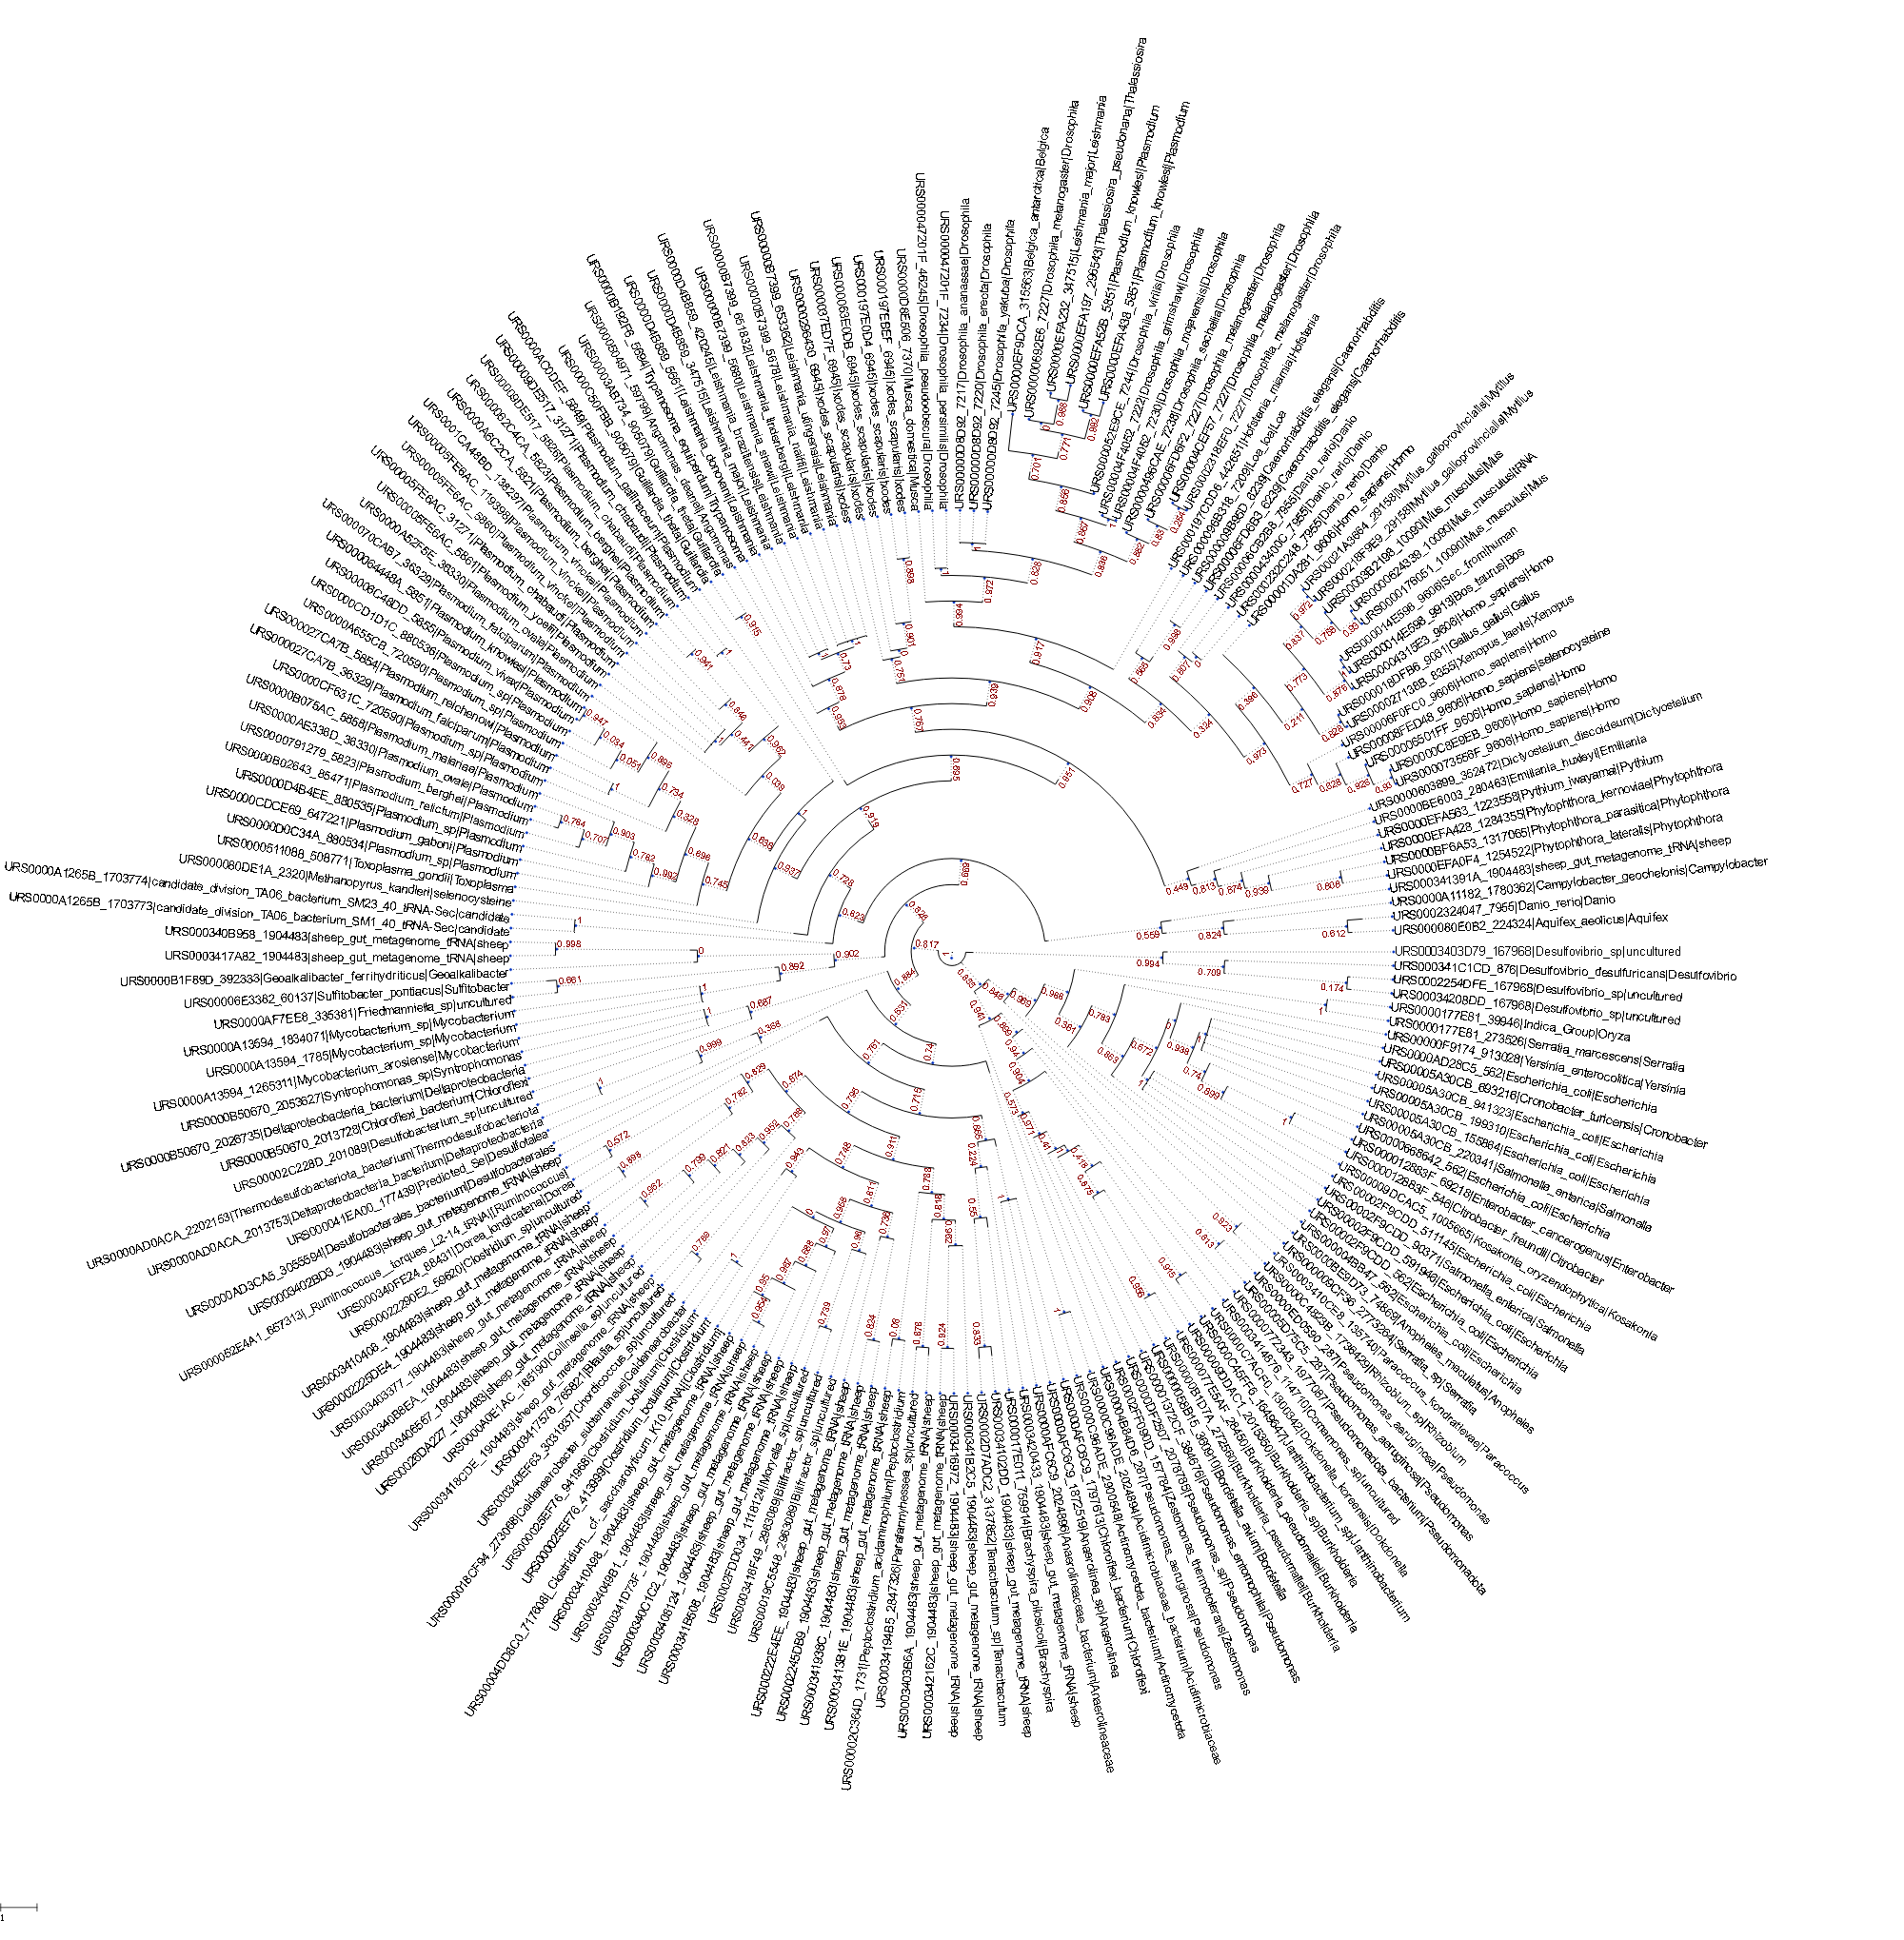

In [22]:
aligner.visualize_tree_radial(
    config.tree_default,
    out_image="../results/figures/tree_radial.png"
)


## 📖 Step 5: Automatic interpretation
Generate a Markdown report with major clades and species distribution.


In [23]:
aligner.interpret_tree_markdown(
    config.tree_default)


# 📖 Automatic interpretation of the phylogenetic tree

- **Total sequences in tree:** 200

## 🧾 Most frequent species

| Rank | Species | # Sequences |
|------|---------|-------------|
| 1 | sheep_gut_metag... | 27 |
| 2 | Homo_sapiens | 7 |
| 3 | Escherichia_coli... | 5 |
| 4 | Plasmodium_sp | 5 |
| 5 | Ixodes_scapularis | 5 |
| 6 | Escherichia_coli | 4 |
| 7 | Drosophila_melanog... | 4 |
| 8 | Danio_rerio | 4 |
| 9 | Desulfovibrio_sp... | 3 |
| 10 | Pseudomonas_aerugin... | 3 |

## 🌳 Major clades detected

Clades with at least **4 sequences** and support > 0.7:

- **Clade 1:** 200 seqs | Support: n/a
  - Main species: sheep_gut_metag... (27), Homo_sapiens (7), Escherichia_coli... (5)

✅ Report saved: ../results/tables/tree_report.md


## 🧬 Step 6: Sequence logo
Create a sequence logo from the aligned FASTA to visualize base conservation.


In [ ]:
aligner.generate_sequence_logo(
    config.aligned_default)


c:\Users\ro-ma\anaconda3\Lib\site-packages\logomaker\src\error_handling.py:58: UserWarning:  Warning: Character '.' is not in color_dict. Using black.
  warnings.warn(str(Error))
c:\Users\ro-ma\anaconda3\Lib\site-packages\logomaker\src\error_handling.py:58: UserWarning:  Warning: Character 'N' is not in color_dict. Using black.
  warnings.warn(str(Error))


## 🌀 Step 7: RNA secondary structure plots
Predict secondary structures for each species using ViennaRNA.


📥 200 sequences loaded, grouped into 118 species.

Generating figures for species: Homo_sapiens (7 sequences)
✅ Figure saved: ../results/figures/rna_plots_by_species\rna_structures_Homo_sapiens_1.png


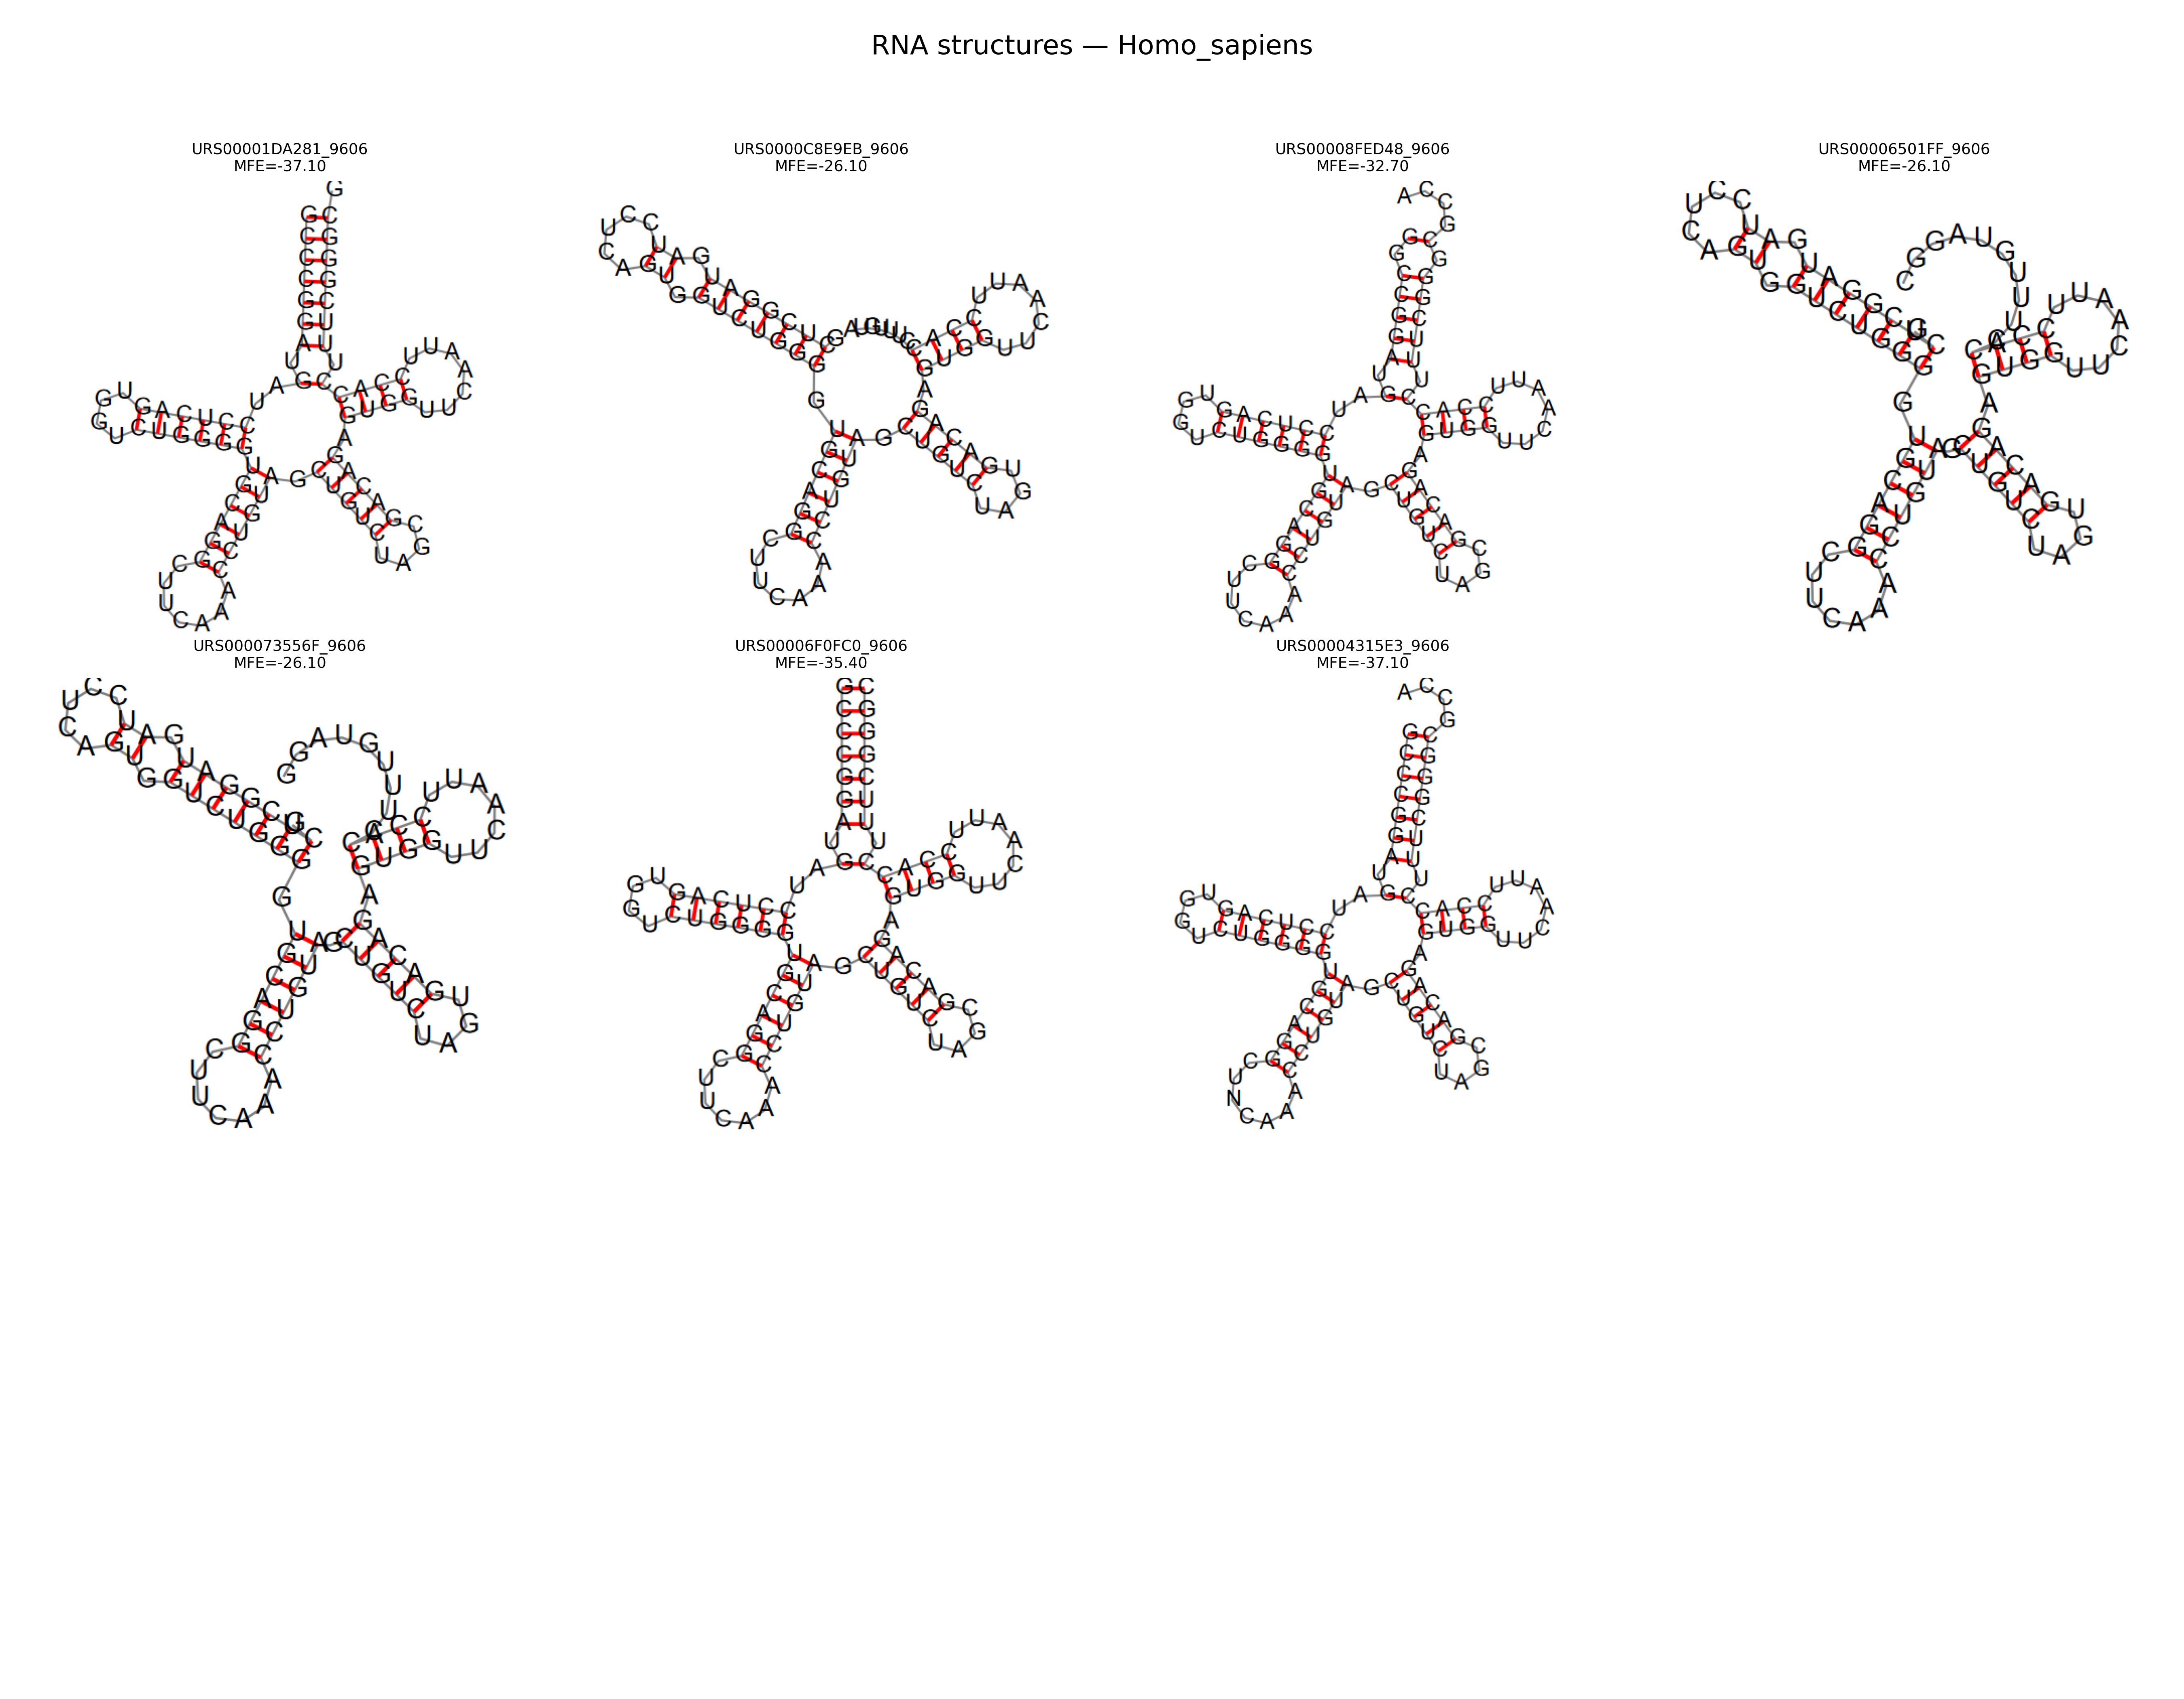


Generating figures for species: Sec_from (1 sequences)
✅ Figure saved: ../results/figures/rna_plots_by_species\rna_structures_Sec_from_1.png

Generating figures for species: Mus_musculus (3 sequences)
✅ Figure saved: ../results/figures/rna_plots_by_species\rna_structures_Mus_musculus_1.png

Generating figures for species: Caenorhabditis_elegans (2 sequences)
✅ Figure saved: ../results/figures/rna_plots_by_species\rna_structures_Caenorhabditis_elegans_1.png

Generating figures for species: Drosophila_melanogaster (4 sequences)
✅ Figure saved: ../results/figures/rna_plots_by_species\rna_structures_Drosophila_melanogaster_1.png

Generating figures for species: Danio_rerio (4 sequences)
⏹️ Global limit of 5 figures reached. Stopping.


In [ ]:
# ✅ Limit total output: stop completely after 5 figures (across ALL species)
#    Useful for testing or quick previews
aligner.plot_rna_by_species(config.fasta_default, total_figures=5)


# ✅ Default behavior: generate ALL figures for ALL species
#plot_rna_by_species(config.fasta_default)
